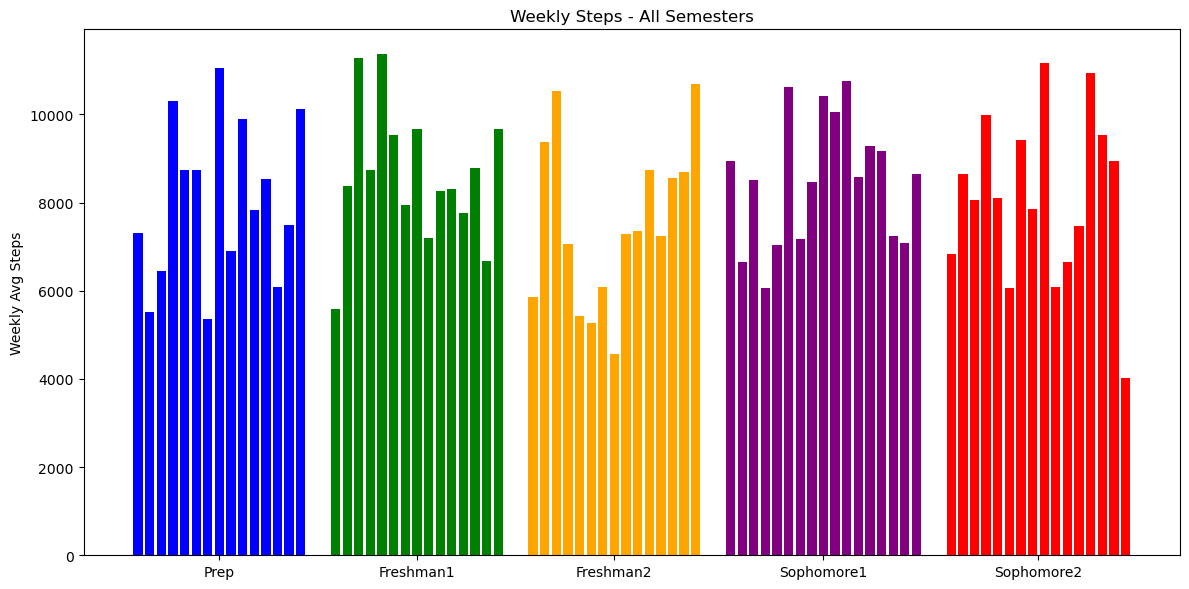

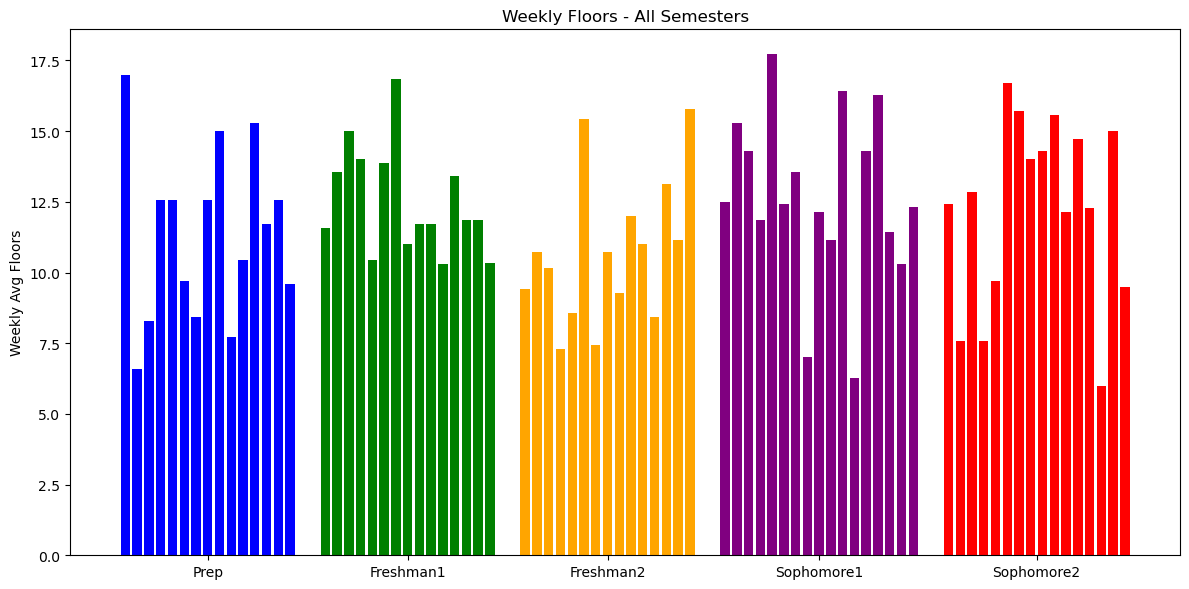

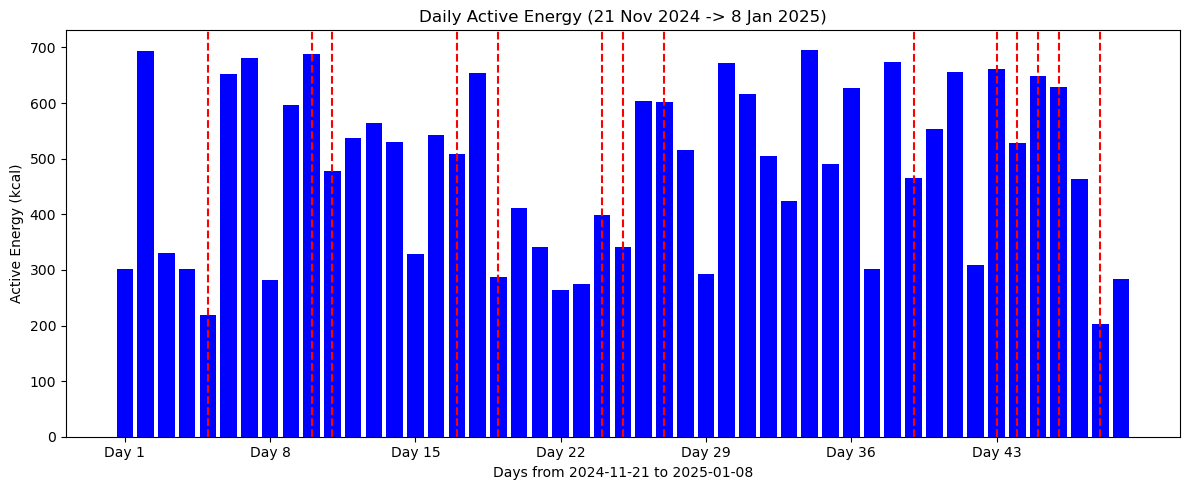

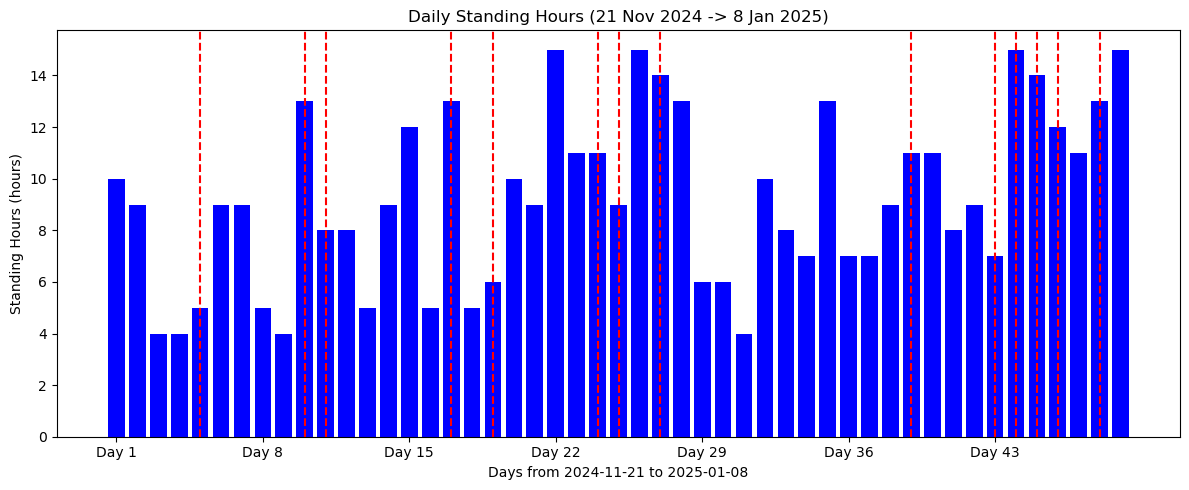

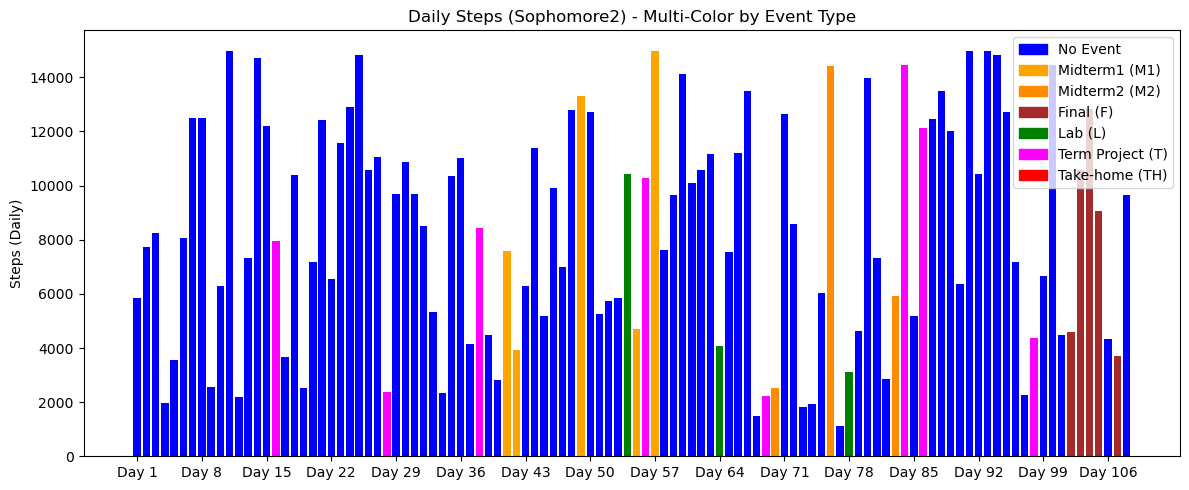

=== Hypothesis Testing: Step Count Trend Across Semesters ===
Trend (slope): 56.07 steps/semester
R-squared: 0.038
P-value: 0.75336
Fail to reject H₀: No significant decrease in step counts across semesters.


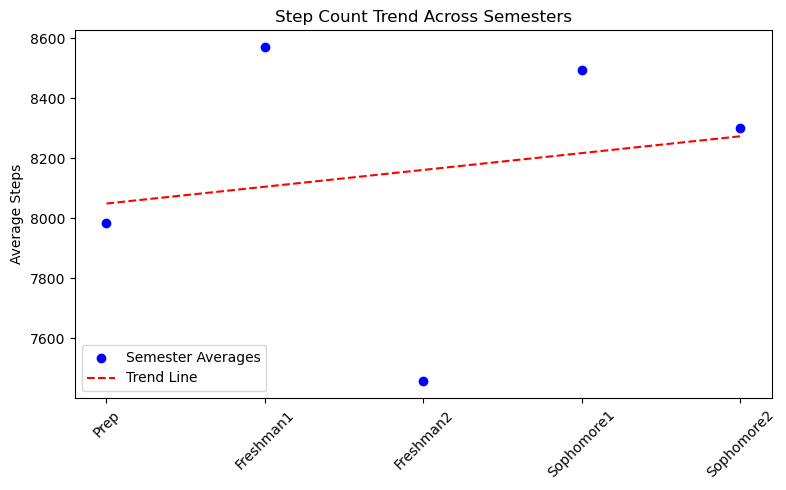

=== Hypothesis Testing: Steps Before Event Days vs Regular Days ===
Days Before Events: n=24, mean=6536.33
Regular Days: n=860, mean=8055.75
t-statistic=-1.900, p-value=0.06932
Reject H₀: Steps are significantly lower on days before events.


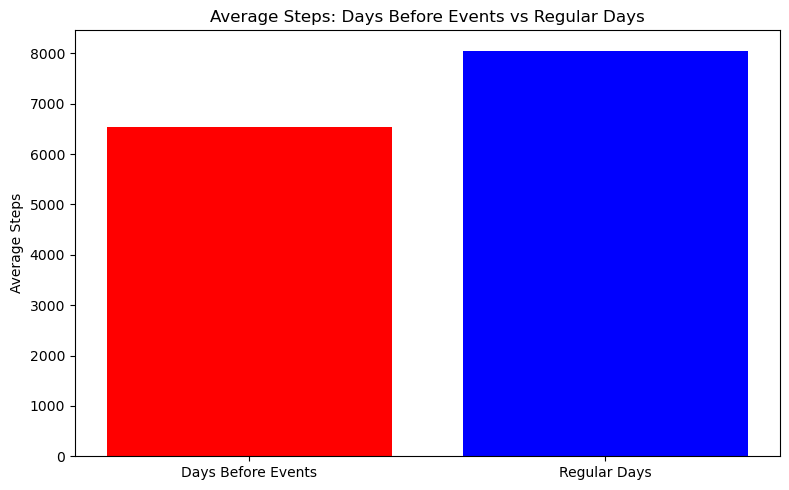

=== Hypothesis Testing: Active Calories During Exam Weeks vs Regular Weeks ===
Interval: 2024-11-21 to 2025-01-07
Exam Weeks: n=34, mean=466.47
Regular Weeks: n=14, mean=534.36
t-statistic=-1.531, p-value=0.13658
Fail to reject H₀: No significant difference in active calories.


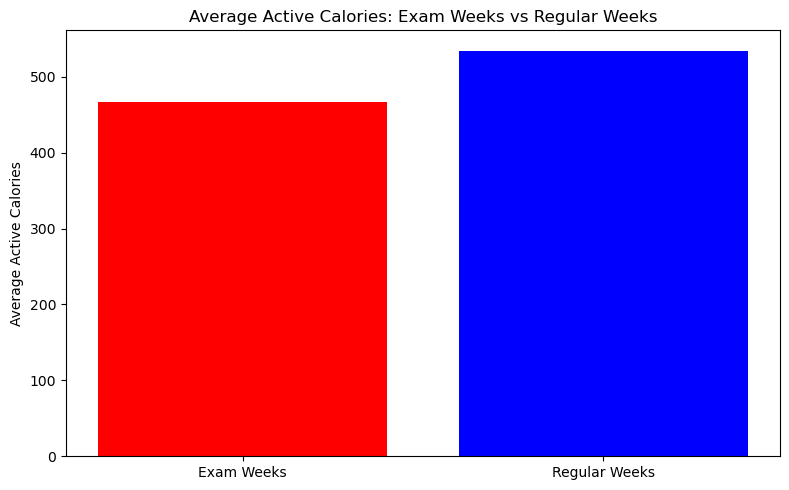

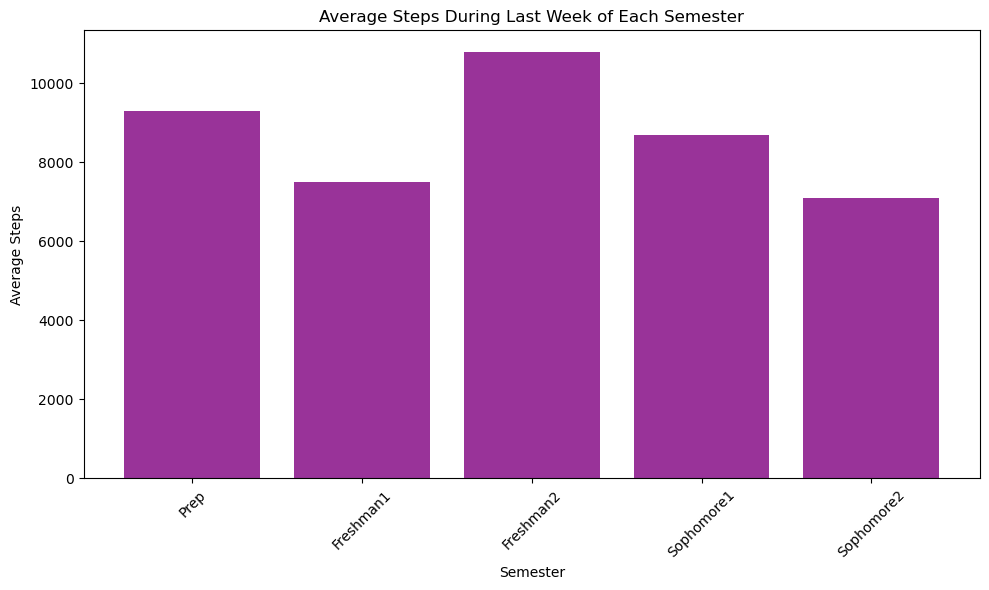

=== Hypothesis Testing: Active Calories on Days Before Midterms/Finals vs Regular Days ===
Interval: 2024-11-21 to 2025-01-08
Days Before Events: n=8, mean=514.75
Regular Days: n=41, mean=475.78
t-statistic=0.643, p-value=0.53485
Fail to reject H₀: No significant difference in active calories.


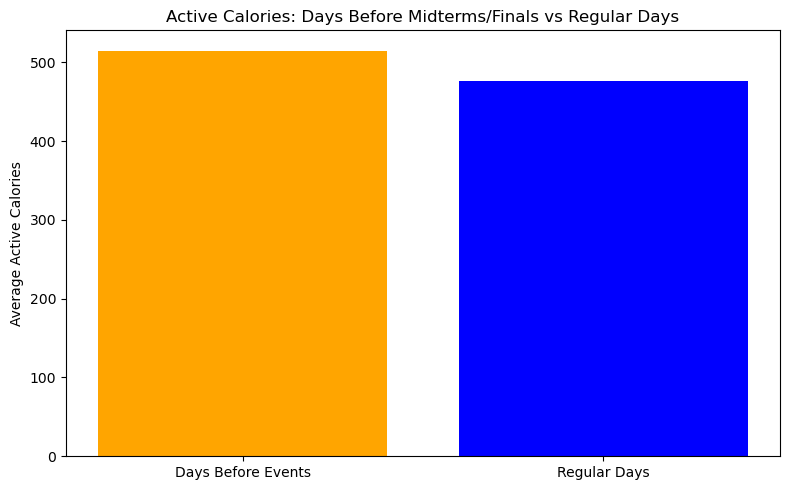

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from bs4 import BeautifulSoup
from scipy import stats

## Parsing the data
def parse_health_xml(xml_path):
    """
    Mocks reading Apple Health data.
    Replace with your real BeautifulSoup parser for 'export.xml'.
    """
    np.random.seed(42)
    date_range = pd.date_range(start="2022-09-01", end="2025-01-31", freq='D')
    df_mock = pd.DataFrame({
        'date': date_range,
        'steps': np.random.randint(1000, 15000, len(date_range)),
        'floors': np.random.randint(0, 25, len(date_range)),
        'active_energy': np.random.randint(200, 700, len(date_range)),
        'standing_hours': np.random.randint(4, 16, len(date_range))
    })
    return df_mock


## Semester starting dates - Semester end dates (Up to the Final Exam end dates of mine)
def get_semesters():
    """
    Five semesters:
      - Prep:        2022-10-03 -> 2023-01-13
      - Freshman1:   2023-02-27 -> 2023-06-07
      - Freshman2:   2023-10-02 -> 2024-01-12
      - Sophomore1:  2024-02-15 -> 2024-06-05
      - Sophomore2:  2024-09-23 -> 2025-01-07
    """
    return [
        ("Prep",         datetime(2022, 10, 3), datetime(2023, 1, 13)),
        ("Freshman1",    datetime(2023, 2, 27), datetime(2023, 6, 7)),
        ("Freshman2",    datetime(2023,10,  2), datetime(2024, 1, 12)),
        ("Sophomore1",   datetime(2024, 2, 15), datetime(2024, 6, 5)),
        ("Sophomore2",   datetime(2024, 9, 23), datetime(2025, 1,  7)),
    ]




# Dictionary of all events, finals, midterms, labs, take-homes, etc. 

event_dates = {
    # Finals
    datetime(2025, 1,  2):  "F(dsa210)",
    datetime(2025, 1,  3):  "F(cs303)",
    datetime(2025, 1,  4):  "F(math204)",
    datetime(2025, 1,  5):  "F(fin401)",
    datetime(2025, 1,  7):  "F(cs204)",

    # Midterm 2
    datetime(2024,12,  1): "M2(math204)",
    datetime(2024,12,  7): "M2(cs204)",
    datetime(2024,12, 14): "M2(cs303)",

    # Midterm 1
    datetime(2024,11,  2): "M1(cs303)",
    datetime(2024,11,  3): "M1(math204)",
    datetime(2024,11, 10): "M1(dsa210)",
    datetime(2024,11, 16): "M1(cs204)",
    datetime(2024,11, 18): "M1(fin401)",

    # CS303 labs & term projects (the days that i have submitted these assignments)
    datetime(2024,11, 15): "L2(cs303)",
    datetime(2024,11, 25): "L3(cs303)",
    datetime(2024,12,  9): "L4(cs303)",
    datetime(2024,12, 17): "T1(cs303)",
    datetime(2024,12, 29): "T3(cs303)",

    # CS204 TAKE HOME (days that i have submitted these assignments)
    datetime(2024,10,  8): "TH1(cs204)",
    datetime(2024,10, 20): "TH2(cs204)",
    datetime(2024,10, 30): "TH3(cs204)",
    datetime(2024,11, 17): "TH4(cs204)",
    datetime(2024,11, 30): "TH5(cs204)",
    datetime(2024,12, 15): "TH6(cs204)",
    datetime(2024,12, 29): "TH7(cs204)",
}




# Existing Graphs (Weekly Steps, Weekly Floors, Daily AE/SH, etc.)

def plot_weekly_by_semester(df, value_col="steps", title="Weekly Steps by Semester"):
    semesters = get_semesters()
    plt.figure(figsize=(12, 6))
    ax = plt.gca()

    group_gap = 2.0
    current_x = 0.0
    x_ticks = []
    x_labels = []

    colors = ["blue", "green", "orange", "purple", "red"]

    for i, (sem_label, start_date, end_date) in enumerate(semesters):
        mask = (df['date'] >= start_date) & (df['date'] <= end_date)
        df_sem = df.loc[mask, ['date', value_col]].copy()
        if df_sem.empty:
            x_ticks.append(current_x)
            x_labels.append(f"{sem_label}\n(No Data)")
            current_x += group_gap
            continue

        df_sem.set_index('date', inplace=True)
        weekly = df_sem.resample('W').mean(numeric_only=True)
        mean_val = weekly[value_col].mean()
        weekly[value_col] = weekly[value_col].fillna(mean_val)

        week_count = len(weekly)
        x_positions = np.arange(week_count) + current_x
        bar_values = weekly[value_col].values

        ax.bar(x_positions, bar_values, color=colors[i], width=0.8)
        midpoint = current_x + (week_count - 1) / 2 if week_count > 0 else current_x
        x_ticks.append(midpoint)
        x_labels.append(sem_label)
        current_x += (week_count + group_gap)

    ax.set_title(title)
    ax.set_ylabel(f"Weekly Avg {value_col.capitalize()}")
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels, rotation=0)

    plt.tight_layout()
    plt.show()



def plot_daily_bars_with_events(df, value_col, title, y_label, start_day, end_day):
    """
    (Existing) daily bar chart if you want lines for each event date.
    """
    mask = (df['date'] >= start_day) & (df['date'] <= end_day)
    df_slice = df.loc[mask, ['date', value_col]].copy()
    if df_slice.empty:
        print(f"No data for {value_col} in [{start_day} -> {end_day}]")
        return

    all_days = pd.date_range(start=start_day, end=end_day, freq='D')
    df_slice.set_index('date', inplace=True)
    df_slice = df_slice.reindex(all_days)
    df_slice.index.name = 'date'

    mean_val = df_slice[value_col].mean()
    df_slice[value_col] = df_slice[value_col].fillna(mean_val)

    N = len(df_slice)
    x_positions = np.arange(N)
    bar_values = df_slice[value_col].values

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(x_positions, bar_values, color='blue', width=0.8)
    ax.set_title(title)
    ax.set_ylabel(y_label)

    tick_indices = np.arange(0, N, 7)
    tick_labels = [f"Day {i+1}" for i in tick_indices]
    ax.set_xticks(tick_indices)
    ax.set_xticklabels(tick_labels, rotation=0)
    ax.set_xlabel(f"Days from {start_day.strftime('%Y-%m-%d')} to {end_day.strftime('%Y-%m-%d')}")

    # If you want lines for each event
    for e_date, e_code in event_dates.items():
        if start_day <= e_date <= end_day:
            x_idx = (e_date - start_day).days
            if 0 <= x_idx < N:
                ax.axvline(x_idx, color='red', linestyle='--', linewidth=1.5)

    plt.tight_layout()
    plt.show()



##############################################################################
# 4) NEW: Multi-Color Daily Steps for Current Semester
##############################################################################
def get_event_color(e_code):
    """
    We parse the code to pick a color:
      - "M1" => orange
      - "M2" => darkorange
      - "F(" => brown
      - "L" => green
      - "T" => magenta
      - "TH" => red
    Otherwise => blue
    """
    if not e_code:
        return 'blue'
    e_code_upper = e_code.upper()
    if "M1" in e_code_upper:
        return 'orange'
    elif "M2" in e_code_upper:
        return 'darkorange'
    elif e_code_upper.startswith("F("):
        return 'brown'
    elif e_code_upper.startswith("L"):
        return 'green'
    elif e_code_upper.startswith("T"):
        return 'magenta'
    elif e_code_upper.startswith("TH"):
        return 'red'
    else:
        return 'blue'  # fallback



def plot_daily_semester_steps_colored_multi(df):
    """
    A new daily histogram: 
      - For Sophomore2 (2024-09-23 -> 2025-01-08)
      - Each day's bar is colored based on the type of event if it matches that date.
    """
    sem_start = datetime(2024, 9, 23)
    sem_end   = datetime(2025, 1, 8)

    mask = (df['date'] >= sem_start) & (df['date'] <= sem_end)
    df_sem = df.loc[mask, ['date', 'steps']].copy()
    if df_sem.empty:
        print("No data in the current semester date range.")
        return

    all_days = pd.date_range(start=sem_start, end=sem_end, freq='D')
    df_sem.set_index('date', inplace=True)
    df_sem = df_sem.reindex(all_days)
    df_sem.index.name = 'date'

    mean_val = df_sem['steps'].mean()
    df_sem['steps'] = df_sem['steps'].fillna(mean_val)

    N = len(df_sem)
    x_positions = np.arange(N)
    step_values = df_sem['steps'].values

    # Determine color for each day
    colors = []
    for i, the_date in enumerate(df_sem.index):
        if the_date in event_dates:
            e_code = event_dates[the_date]
            c = get_event_color(e_code)
            colors.append(c)
        else:
            colors.append('blue')

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(x_positions, step_values, color=colors, width=0.8)
    ax.set_title("Daily Steps (Sophomore2) - Multi-Color by Event Type")
    ax.set_ylabel("Steps (Daily)")

    tick_indices = np.arange(0, N, 7)
    tick_labels  = [f"Day {i+1}" for i in tick_indices]
    ax.set_xticks(tick_indices)
    ax.set_xticklabels(tick_labels, rotation=0)

    # Build a legend
    import matplotlib.patches as mpatches
    legend_patches = [
        mpatches.Patch(color='blue',       label='No Event'),
        mpatches.Patch(color='orange',     label='Midterm1 (M1)'),
        mpatches.Patch(color='darkorange', label='Midterm2 (M2)'),
        mpatches.Patch(color='brown',      label='Final (F)'),
        mpatches.Patch(color='green',      label='Lab (L)'),
        mpatches.Patch(color='magenta',    label='Term Project (T)'),
        mpatches.Patch(color='red',        label='Take-home (TH)'),
    ]
    ax.legend(handles=legend_patches, loc='best')

    plt.tight_layout()
    plt.show()







##hypothesis testing


def test_step_count_trend(df):
    """
    Tests whether step counts decrease significantly across semesters.
    """
    semesters = get_semesters()

    # Calculate average steps per semester
    semester_labels = []
    semester_means = []
    for sem_label, start_date, end_date in semesters:
        mask = (df['date'] >= start_date) & (df['date'] <= end_date)
        df_sem = df.loc[mask, 'steps']
        if not df_sem.empty:
            semester_labels.append(sem_label)
            semester_means.append(df_sem.mean())

    # Perform linear regression
    X = np.arange(len(semester_means)).reshape(-1, 1)  # Semester indices
    y = np.array(semester_means)  # Average steps

    model = LinearRegression()
    model.fit(X, y)
    trend = model.coef_[0]
    r_squared = model.score(X, y)
    p_val = stats.linregress(X.flatten(), y).pvalue

    # Print results
    print("=== Hypothesis Testing: Step Count Trend Across Semesters ===")
    print(f"Trend (slope): {trend:.2f} steps/semester")
    print(f"R-squared: {r_squared:.3f}")
    print(f"P-value: {p_val:.5f}")
    
    alpha = 0.08
    if p_val < alpha:
        print("Reject H₀: There is a significant decrease in step counts across semesters.")
    else:
        print("Fail to reject H₀: No significant decrease in step counts across semesters.")

    # Visualize trend
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color="blue", label="Semester Averages")
    plt.plot(X, model.predict(X), color="red", linestyle="--", label="Trend Line")
    plt.xticks(X.flatten(), semester_labels, rotation=45)
    plt.ylabel("Average Steps")
    plt.title("Step Count Trend Across Semesters")
    plt.legend()
    plt.tight_layout()
    plt.show()






def test_steps_before_events(df, event_dates):
    """
    Compares average steps on days before events (exams, homework, labs)
    to regular days using a t-test.
    """
    # Identify event and regular days
    event_days = set(event_dates.keys())
    days_before_events = {day - timedelta(days=1) for day in event_days}
    
    # Filter data
    df['is_before_event'] = df['date'].isin(days_before_events)
    steps_before_events = df.loc[df['is_before_event'], 'steps']
    steps_regular = df.loc[~df['is_before_event'], 'steps']

    # Perform t-test
    t_stat, p_val = stats.ttest_ind(steps_before_events, steps_regular, equal_var=False)
    
    # Print results
    print("=== Hypothesis Testing: Steps Before Event Days vs Regular Days ===")
    print(f"Days Before Events: n={len(steps_before_events)}, mean={steps_before_events.mean():.2f}")
    print(f"Regular Days: n={len(steps_regular)}, mean={steps_regular.mean():.2f}")
    print(f"t-statistic={t_stat:.3f}, p-value={p_val:.5f}")
    
    alpha = 0.08
    if p_val < alpha:
        print("Reject H₀: Steps are significantly lower on days before events.")
    else:
        print("Fail to reject H₀: No significant difference in steps.")

    # Optional Visualization
    plt.figure(figsize=(8, 5))
    labels = ['Days Before Events', 'Regular Days']
    means = [steps_before_events.mean(), steps_regular.mean()]
    plt.bar(labels, means, color=['red', 'blue'])
    plt.ylabel("Average Steps")
    plt.title("Average Steps: Days Before Events vs Regular Days")
    plt.tight_layout()
    plt.show()




def test_active_calories_exam_weeks(df, event_dates):
    """
    Compares average active calories during weeks with midterms/finals to regular weeks.
    """
    # Define interval
    interval_start = datetime(2024, 11, 21)
    interval_end = datetime(2025, 1, 7)

    # Filter data for the interval
    mask_interval = (df['date'] >= interval_start) & (df['date'] <= interval_end)
    df_interval = df.loc[mask_interval].copy()

    # Identify midterm/final weeks
    event_days = {day for day, event in event_dates.items() if "M" in event or "F" in event}
    event_weeks = {day - timedelta(days=day.weekday()) for day in event_days}  # Week starts on Monday

    # Label weeks
    df_interval['week_start'] = df_interval['date'] - pd.to_timedelta(df_interval['date'].dt.weekday, unit='d')
    df_interval['is_exam_week'] = df_interval['week_start'].isin(event_weeks)

    # Calculate average active calories for exam and regular weeks
    exam_week_calories = df_interval.loc[df_interval['is_exam_week'], 'active_energy']
    regular_week_calories = df_interval.loc[~df_interval['is_exam_week'], 'active_energy']

    # Perform t-test
    t_stat, p_val = stats.ttest_ind(exam_week_calories, regular_week_calories, equal_var=False)

    # Print results
    print("=== Hypothesis Testing: Active Calories During Exam Weeks vs Regular Weeks ===")
    print(f"Interval: {interval_start.date()} to {interval_end.date()}")
    print(f"Exam Weeks: n={len(exam_week_calories)}, mean={exam_week_calories.mean():.2f}")
    print(f"Regular Weeks: n={len(regular_week_calories)}, mean={regular_week_calories.mean():.2f}")
    print(f"t-statistic={t_stat:.3f}, p-value={p_val:.5f}")
    
    alpha = 0.08
    if p_val < alpha:
        print("Reject H₀: Active calories are significantly lower during exam weeks.")
    else:
        print("Fail to reject H₀: No significant difference in active calories.")

    # Optional Visualization
    plt.figure(figsize=(8, 5))
    labels = ['Exam Weeks', 'Regular Weeks']
    means = [exam_week_calories.mean(), regular_week_calories.mean()]
    plt.bar(labels, means, color=['red', 'blue'])
    plt.ylabel("Average Active Calories")
    plt.title("Average Active Calories: Exam Weeks vs Regular Weeks")
    plt.tight_layout()
    plt.show()






def plot_last_week_steps(df):
    """
    Plots the average steps during the last week of each semester.
    """
    semesters = get_semesters()
    last_week_averages = []
    semester_labels = []

    for sem_label, start_date, end_date in semesters:
        last_week_start = end_date - timedelta(days=6)  # Start of the last week
        last_week_end = end_date  # End of the last week

        mask = (df['date'] >= last_week_start) & (df['date'] <= last_week_end)
        df_last_week = df.loc[mask, 'steps']

        if not df_last_week.empty:
            last_week_averages.append(df_last_week.mean())
        else:
            last_week_averages.append(0)  # Placeholder for missing data

        semester_labels.append(sem_label)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(semester_labels, last_week_averages, color="purple", alpha=0.8)
    plt.title("Average Steps During Last Week of Each Semester")
    plt.ylabel("Average Steps")
    plt.xlabel("Semester")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()









##############################################################################
# 5) main() - keep your existing calls, just add the new function
##############################################################################
def main():
    df = parse_health_xml("export.xml")
    df['date'] = pd.to_datetime(df['date'])
    df.sort_values(by='date', inplace=True)

    # (1) Weekly Steps (all 5 semesters)
    plot_weekly_by_semester(df, 'steps', "Weekly Steps - All Semesters")

    # (2) Weekly Floors (all 5 semesters)
    plot_weekly_by_semester(df, 'floors', "Weekly Floors - All Semesters")

    # (3) Daily Active Energy (21 Nov 2024 -> 8 Jan 2025)
    start_day = datetime(2024, 11, 21)
    end_day   = datetime(2025, 1, 8)
    plot_daily_bars_with_events(
        df,
        value_col='active_energy',
        title="Daily Active Energy (21 Nov 2024 -> 8 Jan 2025)",
        y_label="Active Energy (kcal)",
        start_day=start_day,
        end_day=end_day
    )

    # (4) Daily Standing Hours (21 Nov 2024 -> 8 Jan 2025)
    plot_daily_bars_with_events(
        df,
        value_col='standing_hours',
        title="Daily Standing Hours (21 Nov 2024 -> 8 Jan 2025)",
        y_label="Standing Hours (hours)",
        start_day=start_day,
        end_day=end_day
    )



    # (6) NEW GRAPH: Daily Steps for the current semester, multi-color by event type
    plot_daily_semester_steps_colored_multi(df)


    #Hypothesis testing

    test_step_count_trend(df)
    
    test_steps_before_events(df, event_dates)

    test_active_calories_exam_weeks(df, event_dates)


    plot_last_week_steps(df)


    



if __name__ == "__main__":
    main()
